In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils import *
from wls import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

Layer 1 / 3


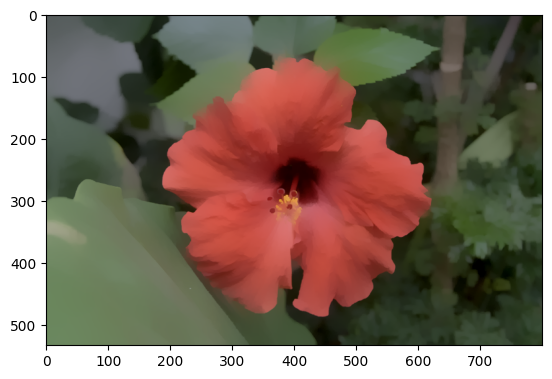

Layer 2 / 3


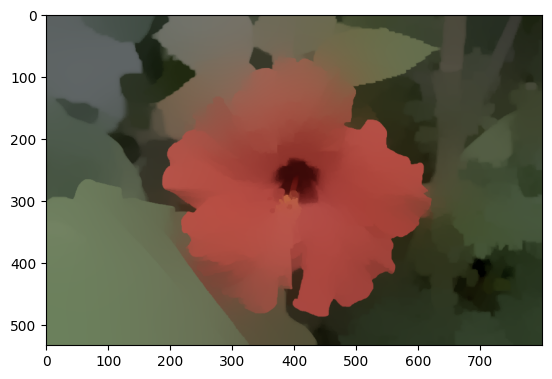

Layer 3 / 3


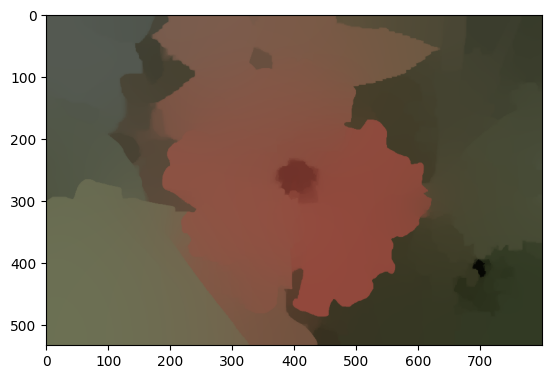

In [3]:
IMAGE_PATH = "../data/image3.png"

image = load_image(IMAGE_PATH, gray=False, verbose=False)

decomposition = wls(image, 0.2, 1.8, c=4, verbose=True)


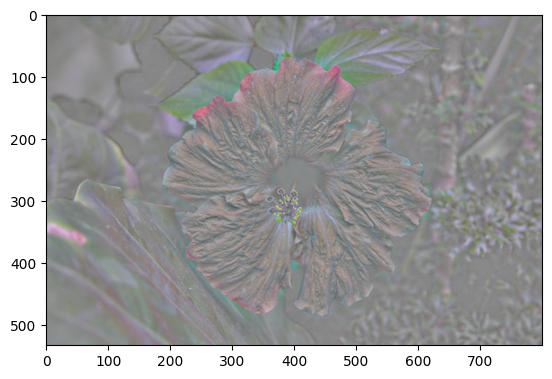

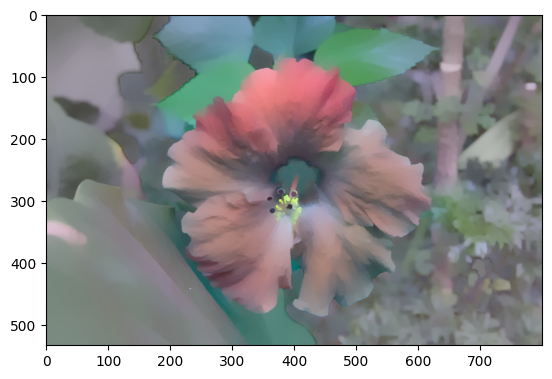

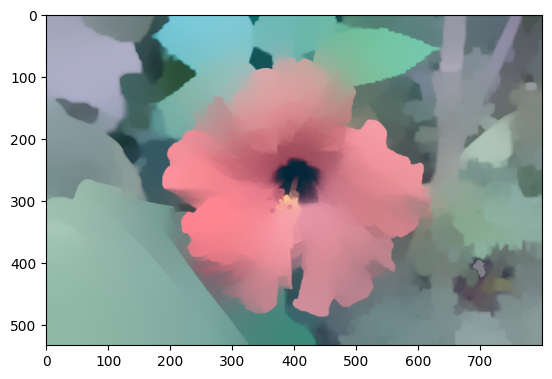

In [4]:
details = create_detail_layers(decomposition)
base = decomposition[-1]

details_recadred = [recadrage_dynamique(detail, 0, 255) for detail in details] # sert à l'affichage
for img in details_recadred:
    plt.imshow(img)
    plt.show()

# details = [recadrage_dynamique(detail[:,:,i], 0, 255).astype(np.uint8) for i in range(3) for detail in details]

# for i in range(0,len(details),3):
#     plt.imshow(np.dstack((details[i], details[i+1], details[i+2])))
#     print(np.shape(np.dstack((details[i], details[i+1], details[i+2]))))
#     plt.show()

In [ ]:
# Create sliders
slider_lst = []
for i in range(len(details)):
    slider = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description=f"Layer {i+1}")
    slider_lst.append(slider)

def update_plot(*args):
    
    recombined_img = base

    for i, weight in enumerate(args):
        recombined_img += details[i] * weight

    plt.imshow(recombined_img)
    plt.axis('off')
    plt.title("Recombined Image")
    plt.show()

out = widgets.interactive_output(update_plot, {f"Layer {i+1}": slider for i, slider in enumerate(slider_lst)})

display(widgets.VBox([widgets.HBox(slider_lst),out]))
plt.show()